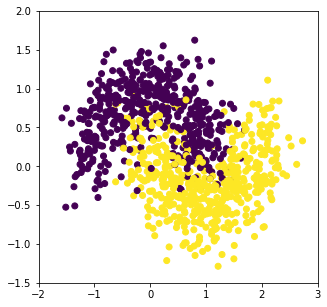

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
#Uyarı mesajlarını kapatmak için
import warnings
warnings.filterwarnings('ignore')

X, y = make_moons(n_samples= 1500, noise=0.3, random_state=0)
X,X_test, y, y_test = train_test_split(X,y, test_size = 0.333, random_state = 0)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c= y)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

In [2]:
from keras.models import Sequential
from keras.layers import Dense

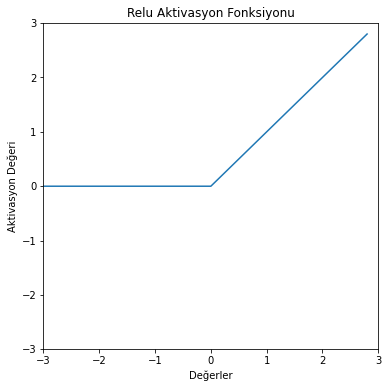

In [3]:
degerler = np.arange(-3, 3, .2)
sifir = np.zeros(len(degerler))
aktivasyon = np.max([sifir, degerler], axis=0)

fig = plt.figure(figsize = (6,6))
plt.plot(degerler, aktivasyon)
plt.ylim([-3.0, 3.0])
plt.xlim([-3.0, 3.0])
plt.ylabel('Aktivasyon Değeri')
plt.xlabel('Değerler')
plt.title('Relu Aktivasyon Fonksiyonu')

plt.show()

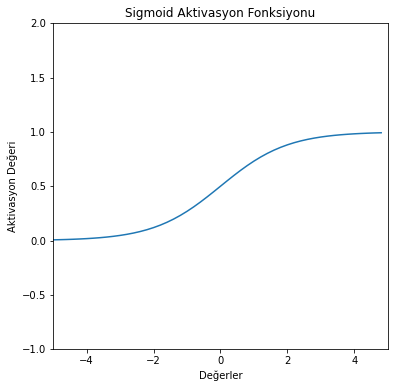

In [4]:
degerler = np.arange(-5, 5, .2)
sigmoid = 1 / (1+ np.exp(-degerler))

fig = plt.figure(figsize = (6,6))
plt.plot(degerler, sigmoid)
plt.ylim([-1.0, 2.0])
plt.xlim([-5.0, 5.0])
plt.ylabel('Aktivasyon Değeri')
plt.xlabel('Değerler')
plt.title('Sigmoid Aktivasyon Fonksiyonu')

plt.show()

In [5]:
# Model oluşturuyoruz.
model = Sequential()
# Modele bir katman (gizli katman) ekliyoruz. Katmanda iki düğüm var ve relu aktivasyon fonksiyonunu kullanıyor. 
model.add(Dense(2, input_dim=2, activation='relu'))
# Aşağıda eklediğimiz katman çıktı katmanı. Bir sınıflandırma problemi üzerine çalıştığımız için
# sigmoid aktivasyon fonksiyonunu kullanıyoruz.
model.add(Dense(1, activation='sigmoid'))

In [6]:
# Modeli derlerken amaç fonksiyonu (loss), eniyileme yöntemini (adam) ve takip edeceğimiz
# başarı ölçütlerini (accuracy) sağlıyoruz.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Batch_size her adımda kaç örneklemin model parametrelerini değiştirmek için kullanılacağını belirtir.
# Epoch ise bütün örneklerin modelden kaç kere geçeceğini söyler.
# Bu durumda her bir epoch 1000/10 = 100 adımdan oluşur. Bu adımların her birinde 10 tane örneklem kullanılarak 
# yapay sinir ağının parametreleri güncellenir.
model.fit(X, y, epochs=15, batch_size=10)

Epoch 1/15
100/100 [==============================] - 1s 696us/step - loss: 0.5675 - accuracy: 0.7272
Epoch 2/15
100/100 [==============================] - 0s 715us/step - loss: 0.5360 - accuracy: 0.7433
Epoch 3/15
100/100 [==============================] - 0s 740us/step - loss: 0.5033 - accuracy: 0.7629
Epoch 4/15
100/100 [==============================] - 0s 732us/step - loss: 0.4691 - accuracy: 0.7779
Epoch 5/15
100/100 [==============================] - 0s 748us/step - loss: 0.4659 - accuracy: 0.7594
Epoch 6/15
100/100 [==============================] - 0s 746us/step - loss: 0.4469 - accuracy: 0.7710
Epoch 7/15
100/100 [==============================] - 0s 763us/step - loss: 0.4305 - accuracy: 0.7839
Epoch 8/15
100/100 [==============================] - 0s 728us/step - loss: 0.4096 - accuracy: 0.7994
Epoch 9/15
100/100 [==============================] - 0s 805us/step - loss: 0.4275 - accuracy: 0.7790
Epoch 10/15
100/100 [==============================] - 0s 749us/step - loss: 0.407

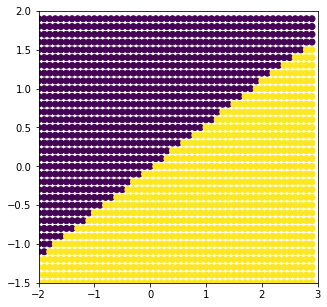

In [8]:
xx, yy = np.meshgrid(np.arange(-2, 3, 0.1),
                     np.arange(-1.5, 2, 0.1))

yhat = model.predict_classes(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(5,5))
plt.scatter(xx,yy, c= yhat)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

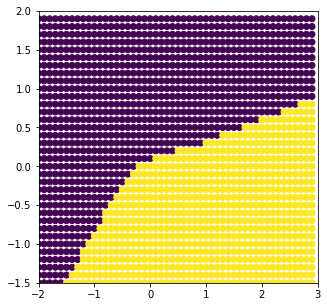

In [13]:
# Modeli 20 düğümlü bir katmanla oluşturalım. Geri kalan adımlar değişmeyecek.
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Modelin çıktılarını kapatmak için verbose = 0 değerini kullanmak gerekiyor.
model.fit(X, y, epochs=15, batch_size=10, verbose = 0)

xx, yy = np.meshgrid(np.arange(-2, 3, 0.1),
                     np.arange(-1.5, 2, 0.1))

yhat = model.predict_classes(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(5,5))
plt.scatter(xx,yy, c= yhat)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

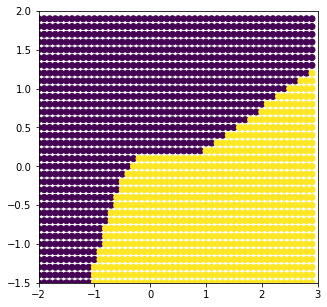

In [10]:
# Bir önceki modeli kullanıyoruz
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Devir sayısını 50 yapalım.
model.fit(X, y, epochs=50, batch_size=10, verbose = 0)

xx, yy = np.meshgrid(np.arange(-2, 3, 0.1),
                     np.arange(-1.5, 2, 0.1))

yhat = model.predict_classes(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(5,5))
plt.scatter(xx,yy, c= yhat)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

In [11]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model

# Girdi katmanını tanımlıyoruz. Girdideki öznitelik sayısını da belirtiyoruz.
# Bizim örneğimizde iki öznitelik var.
inputs = Input(shape=(2,))

# İki tane katman tanımlayacağız. Bunlardan ilki inputs katmanını girdi olarak alıyor ve 20 düğümden oluşuyor.
layer1 = Dense(20, activation='relu')(inputs)
# Dropout katmanı layer1 katmanını girdi olarak kabul ediyor.
layer_dropout = Dropout(rate = 0.1)(layer1)
# İkinci katman ise layer_dropout adlı katmanı girdi olarak alacak ve yine 20 düğümden oluşacak.
layer2 = Dense(20, activation='relu')(layer_dropout)
# Tahmin yaptığımız katman layer2 adlı katmanı girdi olarak alıyor.
# Aktivasyon fonksiyonu ise daha önce de gördüğümüz gibi sigmoid olacak. Bu katman tek bir düğümden oluşuyor.
predictions = Dense(1, activation='sigmoid')(layer2)

# Model oluştururken girdi ve çıktı katmanlarını sağlamamız yeterli.
model = Model(inputs=inputs, outputs=predictions)
# Modeli derlemek ve eğitmek için aynı parametreleri kullanıyoruz.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, batch_size=10, epochs=50, verbose = 0)  # starts training

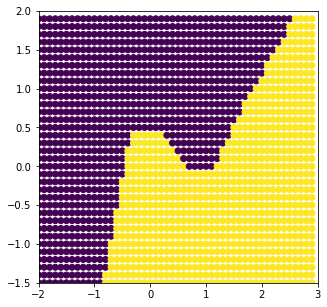

In [12]:
xx, yy = np.meshgrid(np.arange(-2, 3, 0.1),
                     np.arange(-1.5, 2, 0.1))

yhat = ( model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  > 0.5) *1

plt.figure(figsize=(5,5))
plt.scatter(xx,yy, c= yhat)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()